In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
import pickle

In [2]:
df=pd.read_csv('bigmart_Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
cat_cols=df.select_dtypes([object])
num_cols=df.select_dtypes(exclude=[object])

In [10]:
cat_cols.drop(['Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

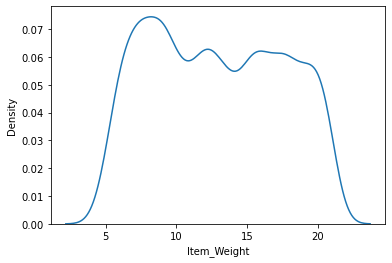

In [12]:
sns.kdeplot(data=df, x=df['Item_Weight'])

In [13]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [16]:
for col in cat_cols.columns:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------------------------------------------------')
    

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
--------------------------------------------------------------------------
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
--------------------------------------------------------------------------
Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
--------------------------------------------------------------------------
Outlet_Location_Type
Tier 3    3

In [17]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             5089
Regular             2889
LF                   316
reg                  117
low fat              112
dtype: int64

In [18]:
# Combine fat content
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [19]:
# Reducing values for outlet year
df['Outlet Years']=2013-df['Outlet_Establishment_Year']


In [20]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,26


## Data Visualization

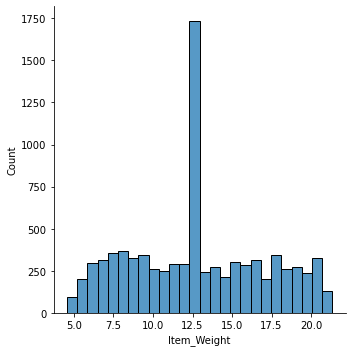

In [21]:
sns.displot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

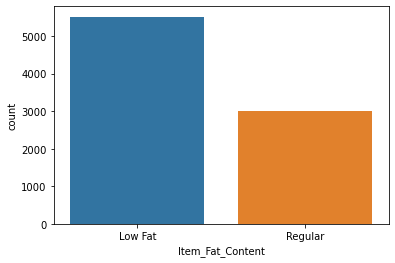

In [22]:
sns.countplot(df['Item_Fat_Content'])

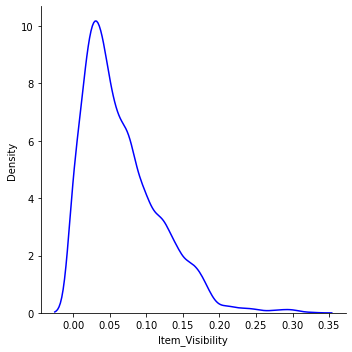

In [23]:
sns.displot(df['Item_Visibility'],kind='kde',color='blue')

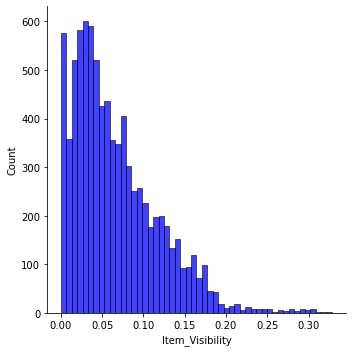

In [24]:
sns.displot(df['Item_Visibility'],kind="hist",color='blue')

In [25]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Item_Type'>

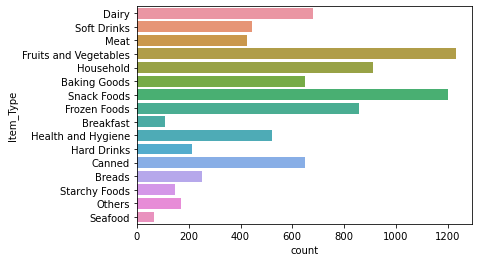

In [26]:
sns.countplot(y=df['Item_Type'])

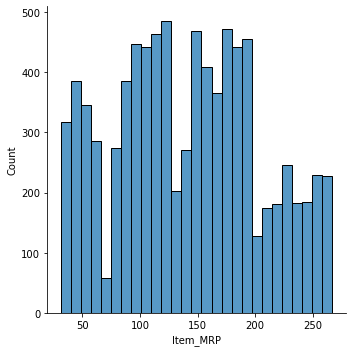

In [27]:
sns.displot(df['Item_MRP'],kind='hist')

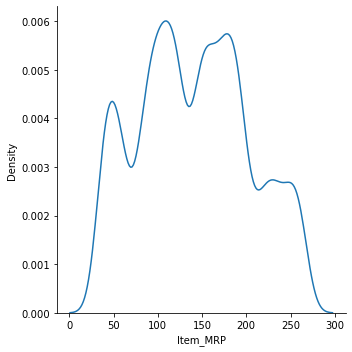

In [28]:
sns.displot(df['Item_MRP'],kind='kde')

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

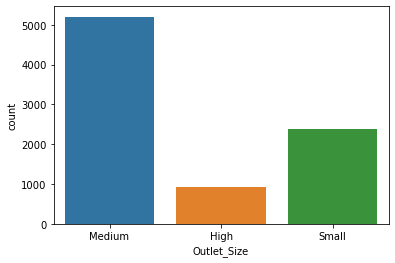

In [29]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

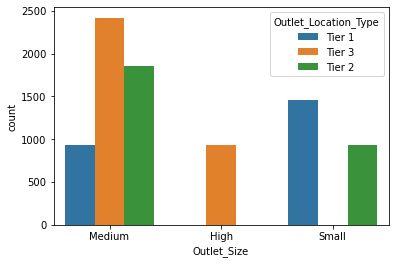

In [30]:
sns.countplot(df['Outlet_Size'],hue=df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

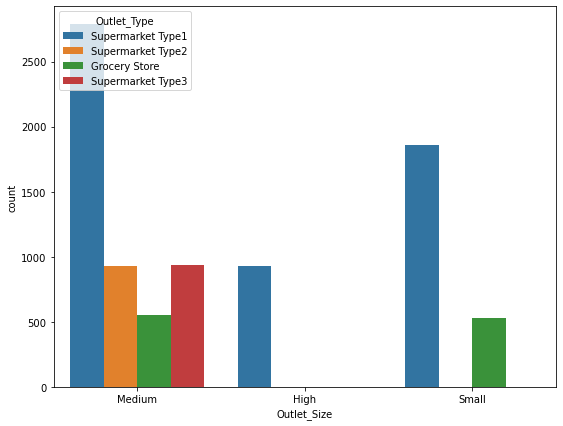

In [31]:
fig, ax = plt. subplots(figsize = (9, 7))
sns.countplot(df['Outlet_Size'],hue=df['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

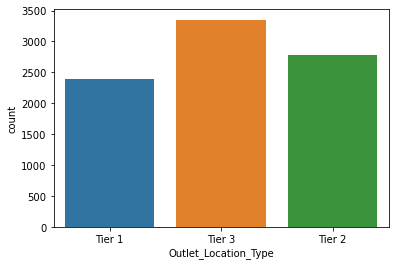

In [32]:
sns.countplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

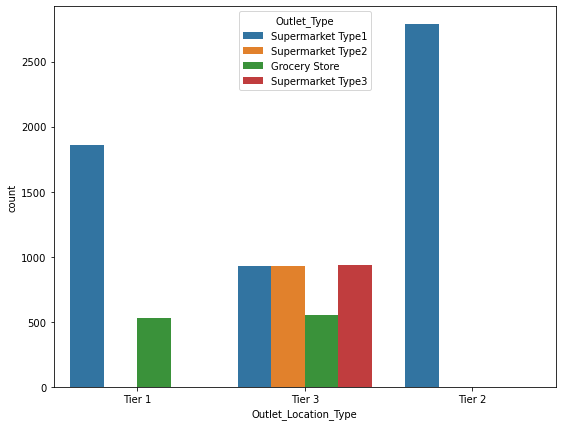

In [33]:
fig, ax = plt. subplots(figsize = (9, 7))
sns.countplot(df['Outlet_Location_Type'],hue=df['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

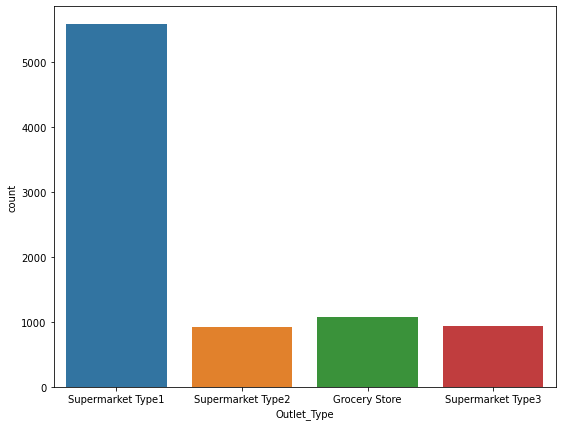

In [34]:
fig, ax = plt. subplots(figsize = (9, 7))
sns.countplot(df['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Outlet Years'>

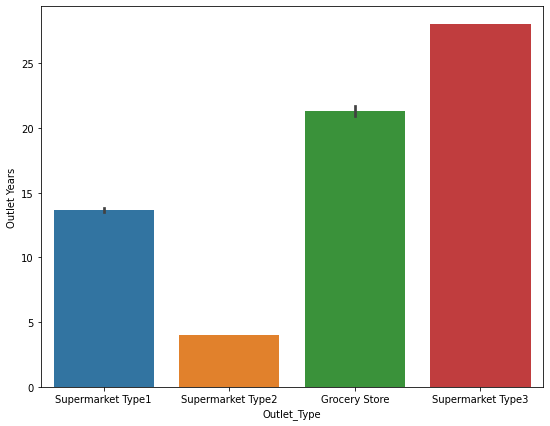

In [35]:
fig, ax = plt. subplots(figsize = (9, 7))
sns.barplot(df['Outlet_Type'],df['Outlet Years'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Outlet Years'>

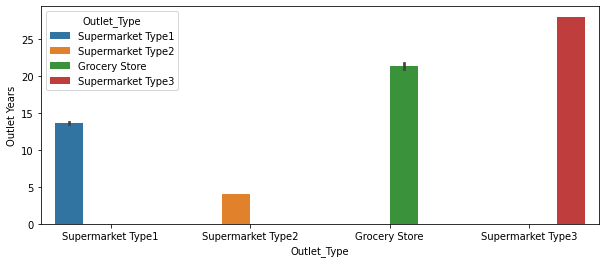

In [36]:
fig, ax = plt. subplots(figsize = (10, 4))
sns.barplot(df['Outlet_Type'],df['Outlet Years'],hue=df['Outlet_Type'])

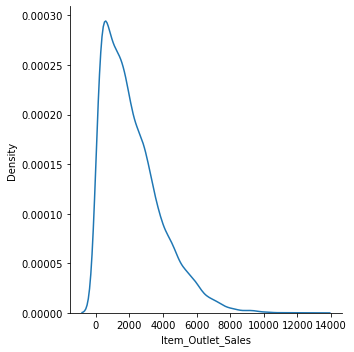

In [37]:
sns.displot(df['Item_Outlet_Sales'],kind='kde')

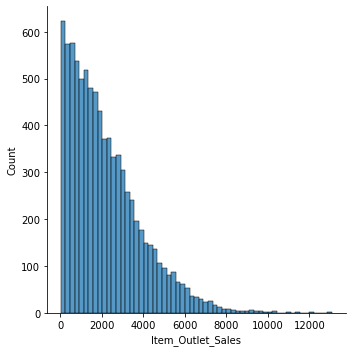

In [38]:
sns.displot(df['Item_Outlet_Sales'],kind='hist')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

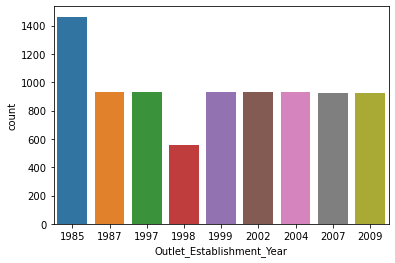

In [39]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

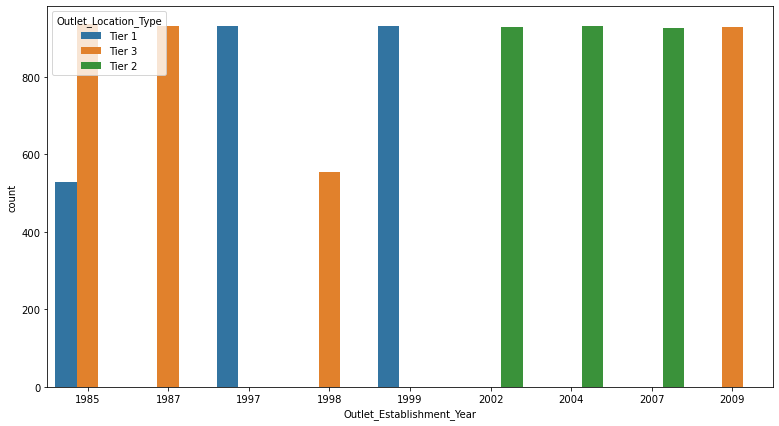

In [40]:
fig, ax = plt. subplots(figsize = (13, 7))
sns.countplot(df['Outlet_Establishment_Year'],hue=df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

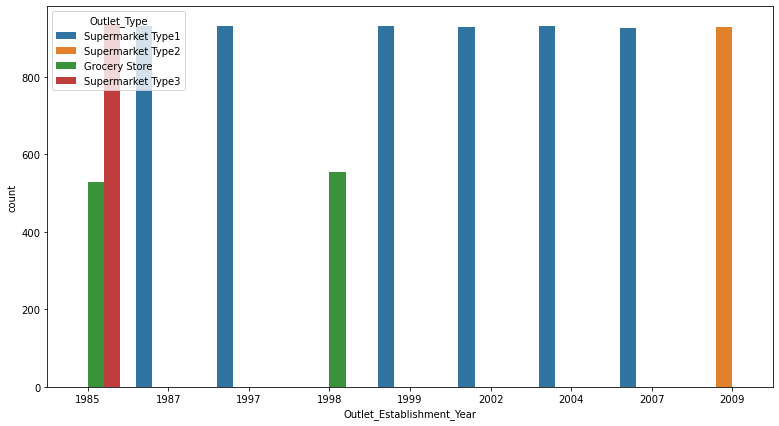

In [41]:
fig, ax = plt. subplots(figsize = (13, 7))
sns.countplot(df['Outlet_Establishment_Year'],hue=df['Outlet_Type'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

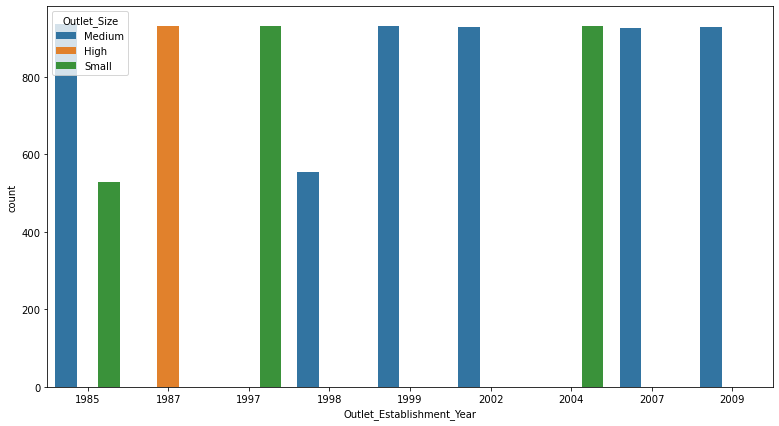

In [42]:
fig, ax = plt. subplots(figsize = (13, 7))
sns.countplot(df['Outlet_Establishment_Year'],hue=df['Outlet_Size'])

In [43]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [44]:
#Checking for correlation
corr=df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet Years
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550,0.008301
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625,0.074834
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000,0.049135
Outlet Years,0.008301,0.074834,-0.005020,-1.000000,0.049135,1.000000


<AxesSubplot:>

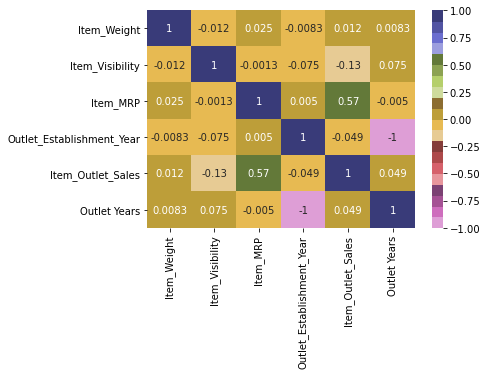

In [45]:
sns.heatmap(corr,annot=True,cmap='tab20b_r')

In [46]:
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [47]:
df1=df.copy()
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Years
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,15
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,26
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,11
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,4


### Checking for transformation

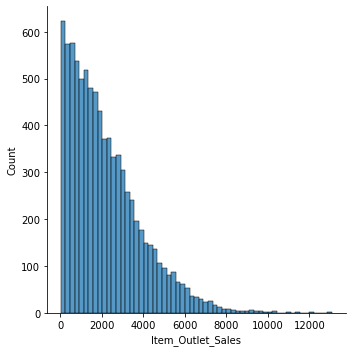

In [48]:
sns.displot(df['Item_Outlet_Sales'])

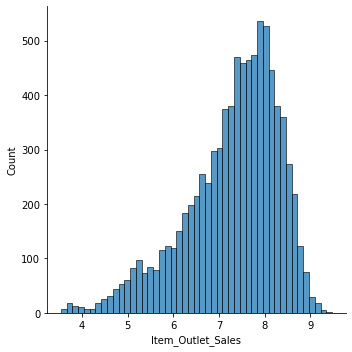

In [49]:
sns.displot(np.log(1+df['Item_Outlet_Sales']))

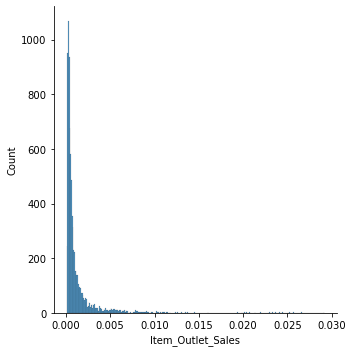

In [50]:
sns.displot(1/(df['Item_Outlet_Sales']+1))

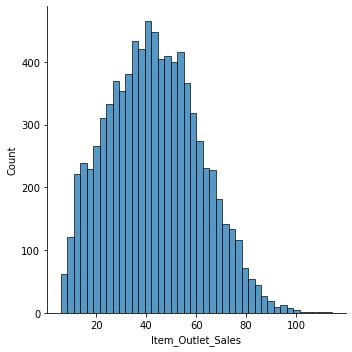

In [51]:
sns.displot(df['Item_Outlet_Sales']**(1/2))

In [52]:
#df['Item_Outlet_Sales_log']=(np.log(1+df['Item_Outlet_Sales']))

In [53]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Years
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,15
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,26
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,11
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,4


### Encoding

In [54]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [55]:
list_cat=list(cat_cols.columns)
df[list_cat] = df[list_cat].apply(le.fit_transform)

In [56]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Years
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,4
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,15
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,26
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,11
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,4


In [57]:
list_cat=list(cat_cols.columns)
df1[list_cat] = df1[list_cat].apply(le.fit_transform)

In [58]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet Years
0,9.300,0,0.016047,4,249.8092,1,0,1,3735.1380,14
1,5.920,1,0.019278,14,48.2692,1,2,2,443.4228,4
2,17.500,0,0.016760,10,141.6180,1,0,1,2097.2700,14
3,19.200,1,0.000000,6,182.0950,1,2,0,732.3800,15
4,8.930,0,0.000000,9,53.8614,0,2,1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,0,2,1,2778.3834,26
8519,8.380,1,0.046982,0,108.1570,1,1,1,549.2850,11
8520,10.600,0,0.035186,8,85.1224,2,1,1,1193.1136,9
8521,7.210,1,0.145221,13,103.1332,1,2,2,1845.5976,4


### Standardization

In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [60]:
scaled=ss.fit_transform(df.drop('Item_Outlet_Sales',axis=1))
scaled

array([[-0.84187169, -0.73814723, -0.97073217, ..., -1.36933384,
        -0.25265831, -0.13954076],
       [-1.64170589,  1.35474328, -0.90811123, ...,  1.09156913,
         1.00297245, -1.33410274],
       [ 1.09855449, -0.73814723, -0.95691733, ..., -1.36933384,
        -0.25265831, -0.13954076],
       ...,
       [-0.53424315, -0.73814723, -0.59978449, ..., -0.13888236,
        -0.25265831, -0.73682175],
       [-1.33644372,  1.35474328,  1.53287976, ...,  1.09156913,
         1.00297245, -1.33410274],
       [ 0.45963367, -0.73814723, -0.41193591, ..., -1.36933384,
        -0.25265831,  0.09937163]])

In [61]:
df_ss=pd.DataFrame(scaled)
df_ss=pd.concat([df_ss,df['Item_Outlet_Sales']],axis=1)
df_ss

,0,1,2,3,4,5,6,7,8,Item_Outlet_Sales
0,-0.841872,-0.738147,-0.970732,-0.766479,1.747454,-0.284581,-1.369334,-0.252658,-0.139541,3735.1380
1,-1.641706,1.354743,-0.908111,1.608963,-1.489023,-0.284581,1.091569,1.002972,-1.334103,443.4228
2,1.098554,-0.738147,-0.956917,0.658786,0.010040,-0.284581,-1.369334,-0.252658,-0.139541,2097.2700
3,1.500838,1.354743,-1.281758,-0.291391,0.660050,-0.284581,1.091569,-1.508289,-0.020085,732.3800
4,-0.929428,-0.738147,-1.281758,0.421242,-1.399220,-1.950437,1.091569,-0.252658,1.293934,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.738147,-0.181193,1.371418,1.180783,-1.950437,1.091569,-0.252658,1.293934,2778.3834
8519,-1.059578,1.354743,-0.371154,-1.716656,-0.527301,-0.284581,-0.138882,-0.252658,-0.497909,549.2850
8520,-0.534243,-0.738147,-0.599784,0.183698,-0.897208,1.381274,-0.138882,-0.252658,-0.736822,1193.1136
8521,-1.336444,1.354743,1.532880,1.371418,-0.607977,-0.284581,1.091569,1.002972,-1.334103,1845.5976


## Model building

In [62]:
x=df1.drop('Item_Outlet_Sales',axis=1)
y=df1['Item_Outlet_Sales']

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [65]:
X=df_ss.drop('Item_Outlet_Sales',axis=1)
Y=df_ss['Item_Outlet_Sales']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

### Linear Regression

In [67]:
lr_model=LinearRegression() 
lr_model.fit(X_train,Y_train)
y1_pred=lr_model.predict(X_test)


result1=cross_val_score(lr_model,X_train,Y_train,cv=KFold(10))


print(result1)
print('---------------------------')
print('CV :',np.mean(result1))
print('---------------------------')
print('MSE:',mean_squared_error(Y_test,y1_pred))
print('---------------------------')
print('MAE :',mean_absolute_error(Y_test,y1_pred))
print('---------------------------')
print('RMSE:',sqrt(mean_squared_error(Y_test,y1_pred)))
print('---------------------------')
print('R2:',r2_score(Y_test,y1_pred))

[0.46769533 0.52813088 0.5155521  0.47872765 0.51851663 0.49751269
 0.48367973 0.54865208 0.4884625  0.48412701]
---------------------------
CV : 0.5011056600711093
---------------------------
MSE: 1293387.3457887392
---------------------------
MAE : 856.0338972476161
---------------------------
RMSE: 1137.2718873641163
---------------------------
R2: 0.5241348086667035


### Decision tree Regressor

In [68]:
dt_model=DecisionTreeRegressor()  
dt_model.fit(x_train,y_train)

y4_pred=dt_model.predict(x_test)


result4=cross_val_score(dt_model,x_train,y_train,cv=KFold(10))


print(result4)
print('---------------------------')
print('CV :',np.mean(result4))
print('---------------------------')
print('MSE:',mean_squared_error(y_test,y4_pred))
print('---------------------------')
print('MAE :',mean_absolute_error(y_test,y4_pred))
print('---------------------------')
print('RMSE:',np.sqrt(mean_squared_error(y_test,y4_pred)))
print('---------------------------')
print('R2:',r2_score(y_test,y4_pred))

[0.15468652 0.15331916 0.22741934 0.14359607 0.15495248 0.14981343
 0.06668166 0.26933141 0.13849126 0.14853648]
---------------------------
CV : 0.1606827787852251
---------------------------
MSE: 2115309.3000893546
---------------------------
MAE : 1005.0752790615836
---------------------------
RMSE: 1454.4102928985874
---------------------------
R2: 0.22173193661310198


### Model Tuning

In [69]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[200,400,600,800,1000,1200]

max_features=['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]



random_grid1={
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'criterion':['mse', 'friedman_mse', 'mae', 'poisson'],
            'splitter':['best', 'random']}

In [70]:
print(random_grid1)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'], 'splitter': ['best', 'random']}


In [71]:
dt=DecisionTreeRegressor()
dt_randomized=RandomizedSearchCV(estimator=dt,param_distributions=random_grid1,n_iter=500,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)

In [72]:
dt_randomized.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'friedman_mse',
                                                      'mae', 'poisson'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [73]:
dt_randomized.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'friedman_mse'}

In [74]:
final_dt_model=dt_randomized.best_estimator_

In [75]:
y_pred_dt_random=final_dt_model.predict(x_test)

In [76]:
print('---------------------------')
print('MSE:',mean_squared_error(y_test,y_pred_dt_random))
print('---------------------------')
print('MAE :',mean_absolute_error(y_test,y_pred_dt_random))
print('---------------------------')
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_dt_random)))
print('---------------------------')
print('R2:',r2_score(y_test,y_pred_dt_random))

---------------------------
MSE: 1131462.2101047023
---------------------------
MAE : 742.9165269346214
---------------------------
RMSE: 1063.7021247063026
---------------------------
R2: 0.5837105698838232


### Random Forest Regressor

In [77]:
rf_model=RandomForestRegressor()  # We normalize our data for better results
rf_model.fit(x_train,y_train)

y5_pred=rf_model.predict(x_test)


result5=cross_val_score(rf_model,x_train,y_train,cv=KFold(10))


print(result5)
print('---------------------------')
print('CV :',np.mean(result5))
print('---------------------------')
print('MSE:',mean_squared_error(y5_pred,y_test))
print('---------------------------')
print('MAE :',mean_absolute_error(y5_pred,y_test))
print('---------------------------')
print('RMSE:',np.sqrt(mean_squared_error(y5_pred,y_test)))
print('---------------------------')
print('R2:',r2_score(y5_pred,y_test))

[0.53388533 0.56596758 0.57566917 0.53597967 0.56189774 0.53138181
 0.52571867 0.60227762 0.52434039 0.52238374]
---------------------------
CV : 0.5479501717491296
---------------------------
MSE: 1200766.1930765305
---------------------------
MAE : 763.4631561114368
---------------------------
RMSE: 1095.7947768978142
---------------------------
R2: 0.36963515401876545


## Hyperparameter Tuning

### RandomizedSearch CV

In [78]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[200,400,600,800,1000,1200]

max_features=['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'criterion':['mse','mae']}

In [79]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse', 'mae']}


In [80]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [81]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200]},
                   random_state=100, verbose=2)

In [82]:
rf_randomized.best_params_       

{'n_estimators': 400,
 'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 670,
 'criterion': 'mse'}

In [83]:
final_rf_model=rf_randomized.best_estimator_

In [84]:
y_pred_random_rf=final_rf_model.predict(x_test)

In [85]:
print('---------------------------')
print('MSE:',mean_squared_error(y_test,y_pred_random_rf))
print('---------------------------')
print('MAE :',mean_absolute_error(y_test,y_pred_random_rf))
print('---------------------------')
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred_random_rf)))
print('---------------------------')
print('R2:',r2_score(y_test,y_pred_random_rf))

---------------------------
MSE: 1054433.8362563213
---------------------------
MAE : 719.9411146775017
---------------------------
RMSE: 1026.856288024922
---------------------------
R2: 0.6120509753925065


## Gradient Boosting Regressor

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()
gb_model.fit(x_train,y_train)

y6_pred=gb_model.predict(x_test)


result6=cross_val_score(gb_model,x_train,y_train,cv=KFold(10))


print(result6)
print('---------------------------')
print('CV :',np.mean(result6))
print('---------------------------')
print('MSE:',mean_squared_error(y6_pred,y_test))
print('---------------------------')
print('MAE :',mean_absolute_error(y6_pred,y_test))
print('---------------------------')
print('RMSE:',np.sqrt(mean_squared_error(y6_pred,y_test)))
print('---------------------------')
print('R2:',r2_score(y6_pred,y_test))





[0.56659619 0.61358595 0.60586153 0.59888364 0.61742347 0.57564055
 0.58899952 0.63803087 0.57160417 0.58163611]
---------------------------
CV : 0.5958262000185792
---------------------------
MSE: 1070781.2304665307
---------------------------
MAE : 720.5696502962319
---------------------------
RMSE: 1034.7855963756601
---------------------------
R2: 0.3676086823600717





### Ada Boost Regresssor

In [87]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_test)


result7=cross_val_score(ab,x_train,y_train,cv=KFold(10))


print(result7)
print('---------------------------')
print('CV :',np.mean(result7))
print('---------------------------')
print('MSE:',mean_squared_error(y_pred_ab,y_test))
print('---------------------------')
print('MAE :',mean_absolute_error(y_pred_ab,y_test))
print('---------------------------')
print('RMSE:',np.sqrt(mean_squared_error(y_pred_ab,y_test)))
print('---------------------------')
print('R2:',r2_score(y_pred_ab,y_test))

[0.39726831 0.50883965 0.51484917 0.34767843 0.54593991 0.47834161
 0.48227516 0.60057352 0.43629915 0.48177108]
---------------------------
CV : 0.4793835989795718
---------------------------
MSE: 1503442.3373949812
---------------------------
MAE : 985.3184921293187
---------------------------
RMSE: 1226.149394403056
---------------------------
R2: -0.12225298069440949


In [88]:
def metrics(model,pred):
    print("------------------------------------------------------------------------")
    print(model,"r2_score :",r2_score(y_test,pred))
    print(model,"mae :",mean_absolute_error(y_test,pred))
    print(model,"mse :",mean_squared_error(y_test,pred))
    print(model,"rmse :",sqrt(mean_squared_error(y_test,pred)))

In [89]:
### Linear Regression ###
metrics(lr_model,y1_pred)

### Decision Tree model ###
metrics(dt_model,y4_pred)

### Random Forest model ###
metrics(rf_model,y5_pred)

### Gradient Boosting model ####
metrics(gb_model,y6_pred)

### AdaBoost model ###
metrics(ab,y_pred_ab)
   
###  Tuned Decision Tree model #####
metrics(final_dt_model,y_pred_dt_random)

### Tuned Random Forest  model ######
metrics(final_rf_model,y_pred_random_rf)


------------------------------------------------------------------------
LinearRegression() r2_score : 0.5241348086667035
LinearRegression() mae : 856.0338972476161
LinearRegression() mse : 1293387.3457887392
LinearRegression() rmse : 1137.2718873641163
------------------------------------------------------------------------
DecisionTreeRegressor() r2_score : 0.22173193661310198
DecisionTreeRegressor() mae : 1005.0752790615836
DecisionTreeRegressor() mse : 2115309.3000893546
DecisionTreeRegressor() rmse : 1454.4102928985874
------------------------------------------------------------------------
RandomForestRegressor() r2_score : 0.5582121349219928
RandomForestRegressor() mae : 763.4631561114368
RandomForestRegressor() mse : 1200766.1930765305
RandomForestRegressor() rmse : 1095.7947768978142
------------------------------------------------------------------------
GradientBoostingRegressor() r2_score : 0.6060364153313068
GradientBoostingRegressor() mae : 720.5696502962319
GradientBoost

In [90]:
with open('sales_predict.pkl','wb') as f:
    pickle.dump(final_rf_model,f)